In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
import geopandas as gpd


# find csv file for dataframe
file_path = "Electric_Vehicle_Population_Data.csv"
ev_df = pd.read_csv(file_path)

#print the new dataframe
ev_df.head()

VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible             200   
2              Not eligible due to low battery range              20   
3  Eligibility unknown as battery range has not b...               0   
4            Clean Alternative Fuel Vehicle Eligible             322   

   Base MSRP  Legislative District  DOL Vehicle ID  Longtitude   Latitude  \
0          0                  14.0         1593721 -120.524012  46.597394   
1          0                   2.0       257167501 -122.817545  46.988760   
2          0                  11.0       224071816 -122.129888  47.445126   
3          0                  21.0       260084653 -122.187300  47.820245   
4          0                  33.0       253771913 -122.201252  47.393181   

   2020 Census Tract  
0       5.307700e+10  
1       5.306701e+10  
2       5.303303e+10  
3       5.306105e+10  
4       5.303303e+10

In [2]:
sorted_df = ev_df.sort_values(by = "Model Year" , ascending = True)
# print(len(sorted_df))
sorted_df.tail(1)

VIN (1-10)  County    City State  Postal Code  Model Year   Make  \
101760  JTJHKCFZ7R  Pierce  Tacoma    WA      98422.0        2024  LEXUS   

       Model                   Electric Vehicle Type  \
101760    NX  Plug-in Hybrid Electric Vehicle (PHEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
101760           Clean Alternative Fuel Vehicle Eligible              37   

        Base MSRP  Legislative District  DOL Vehicle ID  Longtitude  Latitude  \
101760          0                  27.0       259140178  -122.38578  47.28971   

        2020 Census Tract  
101760       5.305394e+10

In [3]:
highest_df = sorted_df.groupby('Make').sum()
highest_df


VIN (1-10)  \
Make                                                                      
ALFA ROMEO            ZASPATCW0RZASPATDW8RZASPATDW2RZASPATCW9RZASPAT...   
AUDI                  WAUTPBFF3GWAUUPBFF6GWAUTPBFF2GWAUUPBFF2GWAUUPB...   
AZURE DYNAMICS        537LS7D49B537LS7D41B537LS7D48B537LS7D48B537LS7...   
BENTLEY                                  SJAAJ2ZV6MSCBBR6ZG0NSCBBR6ZG0N   
BMW                   WBY1Z4C52EWBY1Z2C51EWBY1Z4C51EWBY1Z4C54EWBY1Z4...   
CADILLAC              1G6RM1E43E1G6RS1E48E1G6RL1E42E1G6RR1E41E1G6RR1...   
CHEVROLET             1GCDE14HXV1G1RD6E41B1G1RD6E45B1G1RD6E49B1G1RD6...   
CHRYSLER              2C4RC1N76H2C4RC1N78H2C4RC1N70H2C4RC1N71H2C4RC1...   
DODGE                 ZACPDFCW9RZACPDFCW9RZACPDFCW6RZACPDFCWXRZACPDF...   
FIAT                  3C3CFFGE2D3C3CFFGE9D3C3CFFGE9D3C3CFFGEXD3C3CFF...   
FISKER                YH4K14AA5CYH4K14AA6CYH4K14AA0CYH4K14AA6CYH4K10...   
FORD                  1FTZR1078W1FTZR0812X1FTZR0813X1FTZR0812X1FTZR0...   
GENESIS               KMUKEDTBXPKMUKEDTB6PKMUKCDTC7PKMUKEDTB1PKMTGE4...   
GMC                                                1GT10DDB4R1GT10DDB4R   
HONDA                 JHMCR5F77EJHMCR5F71EJHMCR5F77EJHMCR5F70EJHMCR5...   
HYUNDAI               KMHE14L28GKMHE14L2XGKMHE54L2XGKMHE14L28GKMHE54...   
JAGUAR                SADHD2S16KSADHD2S10KSADHD2S14KSADHD2S19KSADHB2...   
JEEP                  1C4JJXP6XM1C4JJXP6XM1C4JJXP68M1C4JJXP66M1C4JJX...   
KIA                   KNDJX3AE8FKNDJX3AE7FKNDJP3AE9FKNDJX3AE1FKNDJX3...   
LAND ROVER            SALWR2RY9LSALWR2RY9LSALWR2RY8LSALWR2RY8LSALWR2...   
LEXUS                 JTJKKCFZ6NJTJKKCFZ3NJTJKKCFZ5NJTJHKCFZ3NJTJHKC...   
LINCOLN               5LMYJ8XY1L5LMYJ8XY6L5LMYJ8XYXL5LMYJ8XYXL5LMYJ9...   
LUCID                 50EA1GBA8N50EA1GBA2N50EA1GBA7N50EA1DCA4N50EA1G...   
MAZDA                 JM1DRADB0NJM1DRADB6NJM3KKEHA6RJM3KKDHA6RJM3KKE...   
MERCEDES-BENZ         WDDVP9AB7EWDDVP9AB2EWDDVP9AB3EWDDVP9AB4EWDDVP9...   
MINI                  WMZYU7C41JWMZYU7C44JWMZYU7C4XJWMZYU7C45JWMZYU7...   
MITSUBISHI            JA3215H11CJA3215H16CJA3215H1XCJA3215H1XCJA3215...   
NISSAN                JN1AZ0CP3BJN1AZ0CP9BJN1AZ0CP5BJN1AZ0CP4BJN1AZ0...   
POLESTAR              LPSED3KA1MLPSED3KA7MLPSED3KA0MLPSED3KA0MLPSED3...   
PORSCHE               WP0AD2A75EWP0AD2A76EWP0AD2A72EWP0AD2A77EWP0AD2...   
RIVIAN                7FCTGAAA9N7FCEHDB71N7FCEHDB72N7FCEHDB75N7FCTGA...   
SMART                 WMEEJ9AA9DWMEEJ9AA3DWMEEJ9AA2DWMEEJ9AA9DWMEEJ9...   
SUBARU                JF2GTDNCXKJF2GTDNC0KJF2GTDNC3KJF2GTDNC3KJF2GTD...   
TESLA                 5YJRE11B785YJRE11B085YJRE11B085YJRE11B085YJRE1...   
TH!NK                 53TBH2MC4B53TBH2MC3B53TBH2MC0B53TBH2MC0B53TBH2...   
TOYOTA                JT3GS10V32JT3GS10V02JT3GS10VX3JTDKN3DP1CJTDKN3...   
VOLKSWAGEN            WVWKP7AU0FWVWKP7AU7FWVWKP7AU2FWVWKP7AU7FWVWPP7...   
VOLVO                 YV4BC0PL5GYV4BC0PK6GYV4BC0PL7GYV4BC0PL4GYV4BC0...   
WHEEGO ELECTRIC CARS                     1W9WL21BXA1W9WL21B6A1W9WL21B6A   

                                                                 County  \
Make                                                                      
ALFA ROMEO            SnohomishKingKitsapThurstonSnohomishKingSnohom...   
AUDI                  KingKingKingKingKingKingClarkWhatcomKingKitsap...   
AZURE DYNAMICS               WhatcomWhatcomKingKingKingBentonKitsapKing   
BENTLEY                                             SnohomishYakimaKing   
BMW                   KingSnohomishKingKingKingSnohomishKingSan Juan...   
CADILLAC              BentonSnohomishKitsapKitsapKingThurstonKingSno...   
CHEVROLET             SnohomishPierceSan JuanThurstonKingClarkSpokan...   
CHRYSLER              ClallamYakimaPierceKitsapSnohomishKitsapKingTh...   
DODGE                 KingSnohomishKingKingKingKingPierceKingKingKin...   
FIAT                  KingFranklinSpokaneKingGrays HarborKingKingKin...   
FISKER                KingCharlesSnohomishSkagitMasonKingSan JuanPac...   
FORD      

<function matplotlib.pyplot.show(close=None, block=None)>

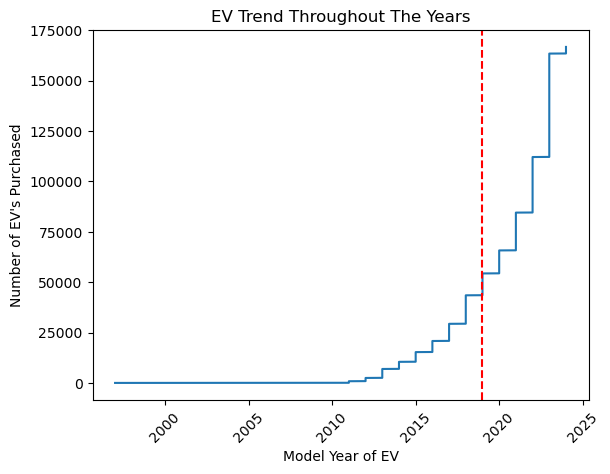

In [6]:
# Show the amount of EV's that have been purchased over the years

cars = list(range(166800))
plt.plot(sorted_df["Model Year"], cars, label = 'Smoothed Curve')
plt.axvline(2019, color='red', linestyle='--', label='Intercept Line')
# plt.xticks(sorted_df[::3])
plt.xticks(rotation = 45)
plt.xlabel('Model Year of EV')
plt.ylabel("Number of EV's Purchased")
plt.title('EV Trend Throughout The Years')
plt.savefig('ev_trend.png')


plt.show

In [33]:
# drop any non numerical value cells in csv
washington_state_df['Latitude'] = pd.to_numeric(washington_state_df['Latitude'], errors='coerce')
washington_state_df['Longtitude'] = pd.to_numeric(washington_state_df['Longtitude'], errors='coerce')
df = washington_state_df.dropna(subset=['Latitude', 'Longtitude'])


In [34]:
# Set Washington State Boundaries
# initial map to show how many EV's are on the road in washington state


washington_state_boundaries = {
    'min_latitude': 45.543541,
    'max_latitude': 49.002494,
    'min_longitude': -124.848974,
    'max_longitude': -116.916305
}

# Filter coordinates within Washington state 
washington_state_df = sorted_df[
    (sorted_df['Latitude'] >= washington_state_boundaries['min_latitude']) &
    (sorted_df['Latitude'] <= washington_state_boundaries['max_latitude']) &
    (sorted_df['Longtitude'] >= washington_state_boundaries['min_longitude']) &
    (sorted_df['Longtitude'] <= washington_state_boundaries['max_longitude'])
]



washington_state_map = washington_state_df[['Longtitude','Latitude']].hvplot.points(geo=True, color='green', tiles='OSM', size=20, frame_width=700, frame_height=550)

washington_state_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longtitude,Latitude]

In [35]:
# Drop rows with the value of '0' in Electric Range Column
no_zero_df = washington_state_df[washington_state_df['Electric Range'] !=0]
no_zero_df.loc[:,['Latitude']] = pd.to_numeric(washington_state_df['Latitude'], errors='coerce')
no_zero_df.loc[:,['Longtitude']] = pd.to_numeric(washington_state_df['Longtitude'], errors='coerce')
final_df = no_zero_df.dropna(subset=['Electric Range'])
# print(len(no_zero_df))
final_df['Electric Range'] = final_df['Electric Range'] /5 +1
# print(len(df))
# final_df

In [36]:
negative_df = (final_df['Electric Range'] > 100).any()
if negative_df:
    print("there's zero")
else:
    print('no negative values')

no negative values


In [37]:
# Set Washington State Boundaries
# visualization to show electric range of each EV in washington state

washington_state_boundaries = {
    'min_latitude': 45.543541,
    'max_latitude': 49.002494,
    'min_longitude': -124.848974,
    'max_longitude': -116.916305
}

# Filter coordinates within Washington state 
washington_state_df = final_df[
    (final_df['Latitude'] >= washington_state_boundaries['min_latitude']) &
    (final_df['Latitude'] <= washington_state_boundaries['max_latitude']) &
    (final_df['Longtitude'] >= washington_state_boundaries['min_longitude']) &
    (final_df['Longtitude'] <= washington_state_boundaries['max_longitude'])
]



washington_state_map = final_df[['Longtitude','Latitude','Electric Range']].hvplot.points(geo=True, color='green', tiles='OSM', size='Electric Range', frame_width=800, frame_height=600, alpha = 0.4)
# washington_state_map.save('wa_state_map.png')
washington_state_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longtitude,Latitude]   (Electric Range)

In [38]:
# show which counties have the most ev's
county_df = sorted_df['County'].value_counts()
# county_df.head(20)
# sorted_df.groupby(['County']).agg(EV_Count = ('County', 'count')).sort_values(by = 'EV_Count', ascending = False)
final_df = pd.DataFrame(county_df).reset_index().head(15)
final_df



County  count
0        King  86594
1   Snohomish  19570
2      Pierce  12972
3       Clark   9847
4    Thurston   6042
5      Kitsap   5522
6     Spokane   4312
7     Whatcom   4039
8      Benton   2028
9      Skagit   1842
10     Island   1796
11    Clallam   1012
12     Chelan    989
13  Jefferson    957
14     Yakima    943

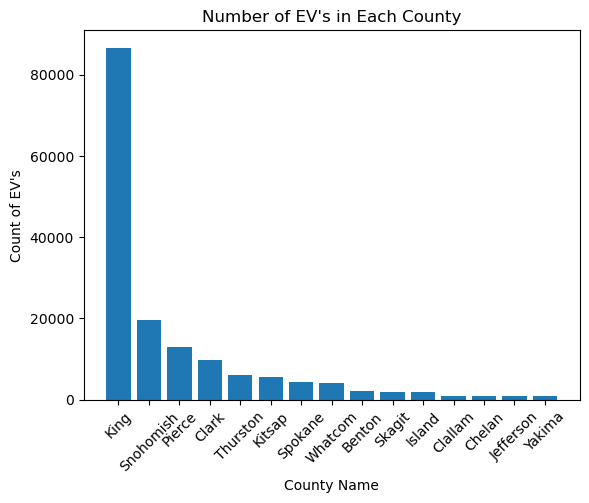

In [32]:
# demonstrate the data with a bar graph
plt.bar(final_df['County'], final_df['count'])
plt.title("Number of EV's in Each County")
plt.ylabel("Count of EV's")
plt.xlabel('County Name')
plt.xticks(rotation = 45)
plt.savefig("ev_county_graph.png", dpi = 300)